# Demo prototypes of IN-CORE services
This notebook shows how to use prototypes of IN-CORE services by using pyincore library. This demo shows how you can use IN-CORE services with other python libraries

In [3]:
from pyincore import FragilityService, DataService, HazardService, ComputeDamage
from pyincore import PlotUtil
from pyincore import InventoryDataset
import pprint
pp = pprint.PrettyPrinter(indent=4)

## Using DataService 
* get_datasets: retriving metadata with a query (by data type or/and by title)
* get_dataset_metadata: retrieving metadata of dataset
* get_dataset: retrieving files of dataset

In [ ]:
metadata = DataService.get_dataset_metadata('http://localhost:8080', '59f3617de1b2b828641a012a')
metadata

In [4]:
DataService.get_datasets('http://localhost:8080',datatype='edu.illinois.ncsa.ergo.eq.buildings.schemas.buildingInventoryVer5.v1.0')

[{'contributors': [],
  'creator': None,
  'date': '2017-10-27T11:40:29-0500',
  'deleted': False,
  'description': '',
  'fileDescriptors': [{'dataURL': 'file:/C:/Rest/59/f3/59f3617de1b2b828641a012c/Hospitals1228337472406.mvz',
    'deleted': False,
    'filename': 'Hospitals1228337472406.mvz',
    'id': '59f3617de1b2b828641a012c',
    'md5sum': 'b14425c3394e923709d7994f433af48e',
    'mimeType': 'application/octet-stream',
    'size': 1554},
   {'dataURL': 'file:/C:/Rest/59/f3/59f3617de1b2b828641a012f/all_bldgs_ver5_WGS1984.dbf',
    'deleted': False,
    'filename': 'all_bldgs_ver5_WGS1984.dbf',
    'id': '59f3617de1b2b828641a012f',
    'md5sum': '7ea0a4c769ca254a6b4821f2e737eb35',
    'mimeType': 'application/octet-stream',
    'size': 10859},
   {'dataURL': 'file:/C:/Rest/59/f3/59f3617de1b2b828641a0132/all_bldgs_ver5_WGS1984.fix',
    'deleted': False,
    'filename': 'all_bldgs_ver5_WGS1984.fix',
    'id': '59f3617de1b2b828641a0132',
    'md5sum': '15c08cc1fac086265cb57ceac0785ac

In [5]:
localfile = DataService.get_dataset('http://localhost:8080', '59f36184e1b2b828641a016c')
buildings = InventoryDataset(localfile)

It already exsists; no unzip


In [6]:
import geopandas as gpd
gdf = gpd.GeoDataFrame.from_features(buildings.inventory_set)
#hospital= gpd.read_file('data/Hospitals1228337472406', layer='all_bldgs_ver5_WGS1984')

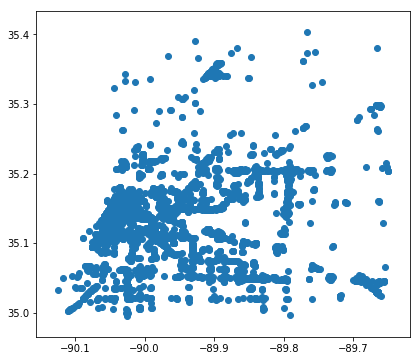

In [7]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 8, 6
gdf.plot()

In [8]:
gdf.head()

IMPUTED  a_stories  appr_bldg  b_stories             bldg_id     broad_occ  \
0       F          1     155100          0   G0232   00169_1_1  Retail Trade   
1       F          1     226300          0   G0231T E00001_1_1  Retail Trade   
2       F          1     587000          0   G0232D A00005_1_1  Retail Trade   
3       F          1     185831          0   G0232D A00004_1_1  Retail Trade   
4       F          1    2221400          0  G0232D A00001C_1_1  Retail Trade   

  bsmt_type  cont_val          dgn_lvl  dwell_unit    ...               parid  \
0      NONE    158917  Moderate - Code           0    ...       G0232   00169   
1      NONE    293480       Low - Code           0    ...       G0231T E00001   
2      NONE    797106      High - Code           0    ...       G0232D A00005   
3      NONE    194454      High - Code           0    ...       G0232D A00004   
4      NONE   1991487      High - Code           0    ...      G0232D A00001C   

         parid_card  repl_cst sq_foot str_cst  str_prob  str_typ2  struct_typ  \
0   G0232   00169_1    158917    1620   46563   0.72857       S1L          S1   
1   G0231T E00001_1    293480    2868   83935   0.44298      URML         URM   
2   G0232D A00005_1    797106   10080  229567   0.95583       S1L          S1   
3   G0232D A00004_1    194454    2091   56975   0.71090      RM1L          RM   
4  G0232D A00001C_1   1991487   26640  573548   1.00000       S1L          S1   

      tract_id year_built  
0  47157021353       1993  
1  47157021342       1960  
2  47157021341       2003  
3  47157021341       2000  
4  47157021341       2001  

[5 rows x 31 columns]

In [9]:
ext = gdf.total_bounds
ext

array([-90.12445285,  34.99578836, -89.65013486,  35.40373372])

In [10]:
import folium

m = folium.Map(location=[-89.88505, 35.220586])
folium.GeoJson(gdf.to_json(), name='hospital').add_to(m)
ext = gdf.total_bounds

In [11]:
m.fit_bounds([[ext[1], ext[0]], [ext[3], ext[2]]])
m

In [12]:
building = next(iter(buildings.inventory_set))

{   'authors': ['Amr S. Elnashai', 'Seong-Hoon Jeong', 'Joshua S. Steelman'],
    'demandType': 'PGA',
    'demandUnits': 'g',
    'description': 'Low-Rise Steel Moment Frame',
    'fragilityCurves': [   {   'beta': 0.441,
                               'className': 'edu.illinois.ncsa.incore.service.fragility.models.PeriodStandardFragilityCurve',
                               'curveType': 'LogNormal',
                               'description': 'Moderate',
                               'median': -1.485,
                               'periodEqnType': 1,
                               'periodParam0': 0.5,
                               'periodParam1': 0.0,
                               'periodParam2': 0.0},
                           {   'beta': 0.441,
                               'className': 'edu.illinois.ncsa.incore.service.fragility.models.PeriodStandardFragilityCurve',
                               'curveType': 'LogNormal',
                               'description': 'Ext

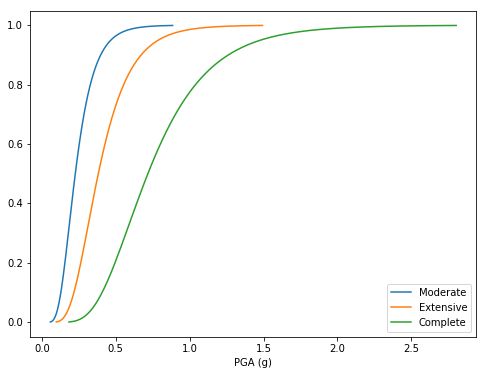

In [13]:
fragility_set = FragilityService.map_fragility('http://localhost:8080', building, "Non-Retrofit Fragility ID Code")
pp.pprint(fragility_set)
for curve in fragility_set['fragilityCurves']:
    x,y = PlotUtil.get_x_y(curve['curveType'],curve['median'],curve['beta'])
    plt.plot(x,y, label=curve['description'])
plt.xlabel(fragility_set['demandType']+" ("+fragility_set['demandUnits']+")")
plt.legend()
plt.show()

In [14]:
latlon = building['geometry']['coordinates']
pp.pprint(latlon)

(-89.75986905862551, 35.06883443099084)


In [15]:
haz_val = HazardService.get_hazard_value("http://localhost:8080", "59f8e10004c01e79c4a67a88", "PGA", "g", latlon[1], latlon[0])
haz_val

0.2757260036065627

In [16]:
damage = ComputeDamage.calculate_damage_json2(fragility_set, haz_val)
damage

OrderedDict([('Moderate', 0.6721738201568781),
             ('Extensive', 0.22964473644611527),
             ('Complete', 0.015056959315507571)])

In [17]:
from pyincore import GlossaryService
term = GlossaryService.get_term("https://resilience-glossary.ncsa.illinois.edu", "Q400")
term.description

m'A tornado is a rapidly rotating column of air that is in contact with both the surface of the Earth and a cumulonimbus cloud or, in rare cases, the base of a cumulus cloud.'

In [ ]:
term

In [18]:
import numpy as np
from scipy import ndimage
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


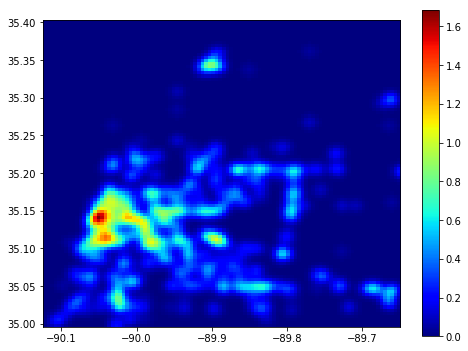

In [19]:
heatmap(gdf, bins=100, smoothing=1.5)

In [ ]:
localfile_res3 = DataService.get_dataset('http://localhost:8080', '59f36185e1b2b828641a0189')
res3 = InventoryDataset(localfile_res3)

In [ ]:
res3_gdf = gpd.GeoDataFrame.from_features(res3.inventory_set)
heatmap(res3_gdf, bins=100, smoothing=1.5)
